In [1]:
def extractData(data_as_lines):
    solution_lengths = []
    expanded_nodes = []

    counter = 1
    for line in data_as_lines:
        if line.startswith("Solution"): 
            this_solution_length = int(line[:-1].split(" ")[-1])
            solution_lengths.append(this_solution_length)
            counter += 1
        elif line.startswith("Unsolvable"):
            solution_lengths.append(float("inf"))
            counter += 1
        if line.startswith("Number"):
            this_expanded_nodes = int(line[:-1].split(" ")[-1])
            expanded_nodes.append(this_expanded_nodes)
    return solution_lengths, expanded_nodes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dtypes = np.dtype(
    [
        ("steps", float),
        ("nodes", int),
        ("method", str),
        ("board_index", int)
    ])

df = pd.DataFrame(np.empty(0, dtype=dtypes))

In [4]:
files_names = [r"manhattanHeuristic.txt", 
               r"smartHeuristic.txt", 
               r"superSmartHeuristic.txt",
               r"output.txt"
              ]

for file_name in files_names:
    with open(file_name) as file:
        lines = file.readlines()
    solution_lengths, expanded_nodes = extractData(lines)
    this_df = pd.DataFrame({'steps': solution_lengths,
                            'nodes': expanded_nodes,
                            'method': [file_name.split('.')[0]] * len(solution_lengths),
                            'board_index': list(range(1, 15))})
    df = df.append(this_df)

<IPython.core.display.Javascript object>


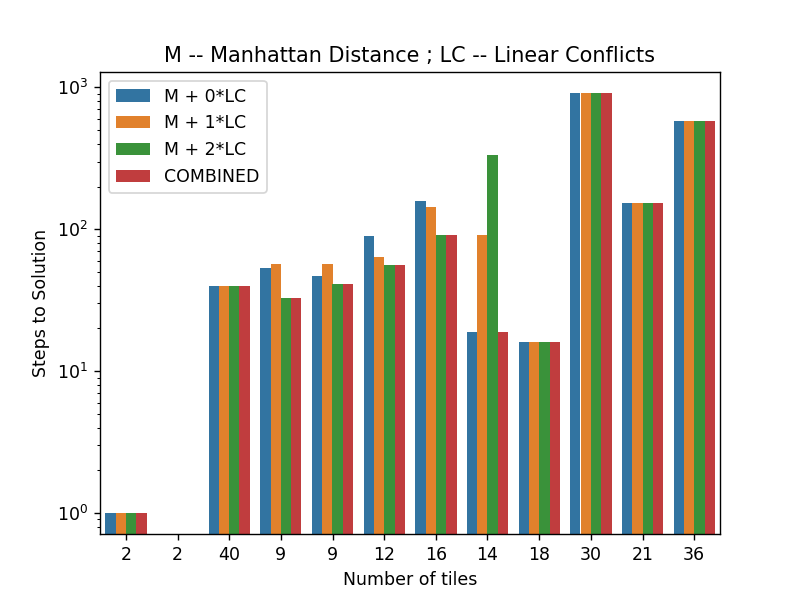

In [5]:
%matplotlib notebook

df = df[df.steps < float("inf")]

fig, ax = plt.subplots()

bar_plot = sns.barplot(x=df.board_index, y=df.steps, hue=df.method, ax=ax)
bar_plot.set_yscale("log")

ax.set_xticklabels([2, 2, 40, 9, 9, 12, 16, 14, 18, 30, 21, 36])
plt.xlabel('Number of tiles')
plt.ylabel('Steps to Solution')
handles, _ = bar_plot.get_legend_handles_labels()
bar_plot.legend(handles, ["M + 0*LC", "M + 1*LC", "M + 2*LC", "COMBINED"])
ax.set_title('M -- Manhattan Distance ; LC -- Linear Conflicts')

plt.show()